# AIGR (Am I Getting Replaced)  v2

It needs to have it's feature claws trimmed - way too many columns

**NEXT STEPS:**
* Look at Correlational Decent Columns  <mark>(**UNDERWAY**)</mark>
* Remove Pants Columns <mark>(**UNDERWAY**)</mark>
* Rerun Train <mark>(**UNDERWAY**)</mark>
* Pay Around with Layers & Nodes <mark>(**UNDERWAY**)</mark>
* Made Front-End Web Endpoint
* Find out I'm getting replaced by my own AI

In [1]:
import mlflow
from pyspark.sql.functions import *
from pyspark.sql.types import FloatType

# Set given experiment as the active experiment. If an experiment with this name does not exist, a new experiment with this name is created.
mlflow.set_experiment("aigr-test-2")


StatementMeta(, d7659f6a-3ac1-4136-8695-afef992ed470, 3, Finished, Available, Finished)

<Experiment: artifact_location='', creation_time=1726815417204, experiment_id='254e5766-ef55-4680-81fd-c02d8a19195e', last_update_time=None, lifecycle_stage='active', name='aigr-test-2', tags={}>

In [2]:
import pandas as pd
# Load data into pandas DataFrame from "/lakehouse/default/Files/ai_job_market_insights.csv"
df = pd.read_csv("/lakehouse/default/Files/ai_job_market_insights.csv")
df_origin = df
display(df)

StatementMeta(, d7659f6a-3ac1-4136-8695-afef992ed470, 4, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, dcfe8324-1558-4907-a6de-60afbb5e6447)

In [3]:
df.shape

StatementMeta(, d7659f6a-3ac1-4136-8695-afef992ed470, 5, Finished, Available, Finished)

(500, 10)

In [4]:
location_set = set(df['Location'])
print(location_set)

StatementMeta(, d7659f6a-3ac1-4136-8695-afef992ed470, 6, Finished, Available, Finished)

{'Paris', 'San Francisco', 'New York', 'Sydney', 'Singapore', 'Berlin', 'Tokyo', 'Toronto', 'Dubai', 'London'}


In [5]:
df['Location_Continent'] = np.where(
    (df.Location == 'Paris') | 
    (df.Location == 'Berlin') | 
    (df.Location == 'London')
    , 'Europe', df['Location'])

df['Location_Continent'] = np.where(
    (df.Location == 'New York') | 
    (df.Location == 'Toronto') |
    (df.Location == 'San Francisco')
    , 'Americas', df['Location_Continent'])

df['Location_Continent'] = np.where(
    (df.Location == 'Dubai') | 
    (df.Location == 'Singapore') |
    (df.Location == 'Tokyo') 
    , 'Asia', df['Location_Continent'])

df['Location_Continent'] = np.where(
    (df.Location == 'Australia')
    , 'Oceania', df['Location_Continent'])

StatementMeta(, d7659f6a-3ac1-4136-8695-afef992ed470, 7, Finished, Available, Finished)

In [6]:
skill_set = set(df['Required_Skills'])
print(skill_set)

StatementMeta(, d7659f6a-3ac1-4136-8695-afef992ed470, 8, Finished, Available, Finished)

{'Data Analysis', 'Communication', 'Cybersecurity', 'Python', 'Sales', 'JavaScript', 'Machine Learning', 'Marketing', 'UX/UI Design', 'Project Management'}


In [7]:
df['Skill_Group'] = np.where(
    (df.Required_Skills == 'Data Analysis') | 
    (df.Required_Skills == 'Python') |
    (df.Required_Skills == 'Machine Learning') |
    (df.Required_Skills == 'JavaScript')
    , 'Data_and_AI', df['Required_Skills'])

df['Skill_Group'] = np.where(
    (df.Required_Skills == 'UX/UI Design')
    , 'Design', df['Skill_Group'])

df['Skill_Group'] = np.where(
    (df.Required_Skills == 'Cybersecurity')
    , 'Security', df['Skill_Group'])

df['Skill_Group'] = np.where(
    (df.Required_Skills == 'Project Management') |
    (df.Required_Skills == 'Communication')
    , 'Project', df['Skill_Group'])

df['Skill_Group'] = np.where(
    (df.Required_Skills == 'Sales') |
    (df.Required_Skills == 'Marketing')
    , 'Sales', df['Skill_Group'])

StatementMeta(, d7659f6a-3ac1-4136-8695-afef992ed470, 9, Finished, Available, Finished)

In [8]:
industry_set = set(df['Industry'])
print(industry_set)

StatementMeta(, d7659f6a-3ac1-4136-8695-afef992ed470, 10, Finished, Available, Finished)

{'Finance', 'Education', 'Healthcare', 'Entertainment', 'Technology', 'Manufacturing', 'Energy', 'Transportation', 'Telecommunications', 'Retail'}


In [9]:
df['Vertical'] = np.where(
    (df.Industry == 'Finance')
    , 'Financial_Services', df['Industry'])

df['Vertical'] = np.where(
    (df.Industry == 'Healthcare')
    , 'Healthcare', df['Vertical'])

df['Vertical'] = np.where(
    (df.Industry == 'Technology')
    , 'Technology', df['Vertical'])

df['Vertical'] = np.where(
    (df.Industry == 'Manufacturing') |
    (df.Industry == 'Transportation')
    , 'Manufacturing_and_Mobility', df['Vertical'])

df['Vertical'] = np.where(
    (df.Industry == 'Education')
    , 'Education', df['Vertical'])

df['Vertical'] = np.where(
    (df.Industry == 'Retail') |
    (df.Industry == 'Telecommunications') |
    (df.Industry == 'Entertainment')
    , 'Retail', df['Vertical'])

df['Vertical'] = np.where(
    (df.Industry == 'Energy')
    , 'Sustainability', df['Vertical'])

StatementMeta(, d7659f6a-3ac1-4136-8695-afef992ed470, 11, Finished, Available, Finished)

In [10]:
df['Salary_USD_Group'] = np.where(
    (df.Salary_USD > 250000.000000)
    , 'Over_250K', df['Salary_USD'])

df['Salary_USD_Group'] = np.where(
    (df.Salary_USD < 250000.000000)
    , 'Under_250K', df['Salary_USD'])

df['Salary_USD_Group'] = np.where(
    (df.Salary_USD < 200000.000000)
    , 'Under_200K', df['Salary_USD'])

df['Salary_USD_Group'] = np.where(
    (df.Salary_USD < 100000.000000)
    , 'Under_100K', df['Salary_USD_Group'])

df['Salary_USD_Group'] = np.where(
    (df.Salary_USD < 75000.000000)
    , 'Under_75K', df['Salary_USD_Group'])

df['Salary_USD_Group'] = np.where(
    (df.Salary_USD < 50000.000000)
    , 'Under_50K', df['Salary_USD_Group'])

df['Salary_USD_Group'] = np.where(
    (df.Salary_USD < 25000.000000)
    , 'Under_25K', df['Salary_USD_Group'])

df['Salary_USD_Group'] = np.where(
    (df.Salary_USD < 10000.000000)
    , 'Under_10K', df['Salary_USD_Group'])

StatementMeta(, d7659f6a-3ac1-4136-8695-afef992ed470, 12, Finished, Available, Finished)

In [11]:
job_set = set(df['Job_Title'])
print(job_set)

StatementMeta(, d7659f6a-3ac1-4136-8695-afef992ed470, 13, Finished, Available, Finished)

{'Cybersecurity Analyst', 'UX Designer', 'AI Researcher', 'Sales Manager', 'Product Manager', 'Software Engineer', 'Operations Manager', 'Marketing Specialist', 'HR Manager', 'Data Scientist'}


In [12]:
df['Job_Type'] = np.where(
    (df.Job_Title == 'AI Researcher') | 
    (df.Job_Title == 'Data Scientist')
    , 'Data_and_AI', df['Job_Title'])

df['Job_Type'] = np.where(
    (df.Job_Title == 'UX Designer') | 
    (df.Job_Title == 'Software Engineer') 
    , 'Design', df['Job_Type'])

df['Job_Type'] = np.where(
    (df.Job_Title == 'Cybersecurity Analyst')
    , 'Security', df['Job_Type'])

df['Job_Type'] = np.where(
    (df.Job_Title == 'Project Management') |
    (df.Job_Title == 'Operations Manager')
    , 'Project', df['Job_Type'])

df['Job_Type'] = np.where(
    (df.Job_Title == 'HR Manager')
    , 'HR', df['Job_Type'])

df['Job_Type'] = np.where(
    (df.Job_Title == 'Sales Manager') |
    (df.Job_Title == 'Product Manager') |
    (df.Job_Title == 'Marketing Specialist')
    , 'Sales', df['Job_Type'])

df

StatementMeta(, d7659f6a-3ac1-4136-8695-afef992ed470, 14, Finished, Available, Finished)

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection,Location_Continent,Skill_Group,Vertical,Salary_USD_Group,Job_Type
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth,Asia,Design,Retail,Under_200K,Security
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline,Asia,Sales,Technology,Under_100K,Sales
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth,Asia,Design,Technology,Under_200K,Data_and_AI
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth,Europe,Project,Retail,Under_100K,Sales
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline,Asia,Data_and_AI,Retail,Under_100K,Security
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,Yes,Stable,Europe,Data_and_AI,Retail,Under_200K,Data_and_AI
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline,Europe,Design,Retail,Under_200K,Security
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,Yes,Stable,Asia,Design,Sustainability,Under_100K,Security
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150625,Yes,Stable,Europe,Data_and_AI,Healthcare,Under_100K,Project


In [13]:
df = df.drop(['Job_Title','Location','Required_Skills','Industry'], axis = 1)

StatementMeta(, d7659f6a-3ac1-4136-8695-afef992ed470, 15, Finished, Available, Finished)

In [14]:
df.head(3)

StatementMeta(, d7659f6a-3ac1-4136-8695-afef992ed470, 16, Finished, Available, Finished)

,Company_Size,AI_Adoption_Level,Automation_Risk,Salary_USD,Remote_Friendly,Job_Growth_Projection,Location_Continent,Skill_Group,Vertical,Salary_USD_Group,Job_Type
0,Small,Medium,High,111392.165243,Yes,Growth,Asia,Design,Retail,Under_200K,Security
1,Large,Medium,High,93792.562466,No,Decline,Asia,Sales,Technology,Under_100K,Sales
2,Large,Medium,High,107170.263069,Yes,Growth,Asia,Design,Technology,Under_200K,Data_and_AI


In [15]:
df['Automation_Risk'] = np.where(df['Automation_Risk'] == "High", 1.0, df['Automation_Risk'])
df['Automation_Risk'] = np.where(df['Automation_Risk'] == "Medium", 0.5, df['Automation_Risk'])
df['Automation_Risk'] = np.where(df['Automation_Risk'] == "Low", 0.0, df['Automation_Risk'])

df['AI_Adoption_Level'] = np.where(df['AI_Adoption_Level'] == "High", 1.0, df['AI_Adoption_Level'])
df['AI_Adoption_Level'] = np.where(df['AI_Adoption_Level'] == "Medium", 0.5, df['AI_Adoption_Level'])
df['AI_Adoption_Level'] = np.where(df['AI_Adoption_Level'] == "Low", 0.0, df['AI_Adoption_Level'])

df['Remote_Friendly'] = np.where(df['Remote_Friendly'] == "Yes", 1.0, df['Remote_Friendly'])
df['Remote_Friendly'] = np.where(df['Remote_Friendly'] == "No", 0.0, df['Remote_Friendly'])

df['Job_Growth_Projection'] = np.where(df['Job_Growth_Projection'] == "Growth", 1.0, df['Job_Growth_Projection'])
df['Job_Growth_Projection'] = np.where(df['Job_Growth_Projection'] == "Stable", 0.5, df['Job_Growth_Projection'])
df['Job_Growth_Projection'] = np.where(df['Job_Growth_Projection'] == "Decline", 0.0, df['Job_Growth_Projection'])

df['Company_Size'] = np.where(df['Company_Size'] == "Large", 1.0, df['Company_Size'])
df['Company_Size'] = np.where(df['Company_Size'] == "Medium", 0.5, df['Company_Size'])
df['Company_Size'] = np.where(df['Company_Size'] == "Small", 0.0, df['Company_Size'])

StatementMeta(, d7659f6a-3ac1-4136-8695-afef992ed470, 17, Finished, Available, Finished)

In [16]:
df = df.replace(to_replace = "UX/UI Design", value = "UXUI_Design")

df

StatementMeta(, d7659f6a-3ac1-4136-8695-afef992ed470, 18, Finished, Available, Finished)

,Company_Size,AI_Adoption_Level,Automation_Risk,Salary_USD,Remote_Friendly,Job_Growth_Projection,Location_Continent,Skill_Group,Vertical,Salary_USD_Group,Job_Type
0,0.0,0.5,1.0,111392.165243,1.0,1.0,Asia,Design,Retail,Under_200K,Security
1,1.0,0.5,1.0,93792.562466,0.0,0.0,Asia,Sales,Technology,Under_100K,Sales
2,1.0,0.5,1.0,107170.263069,1.0,1.0,Asia,Design,Technology,Under_200K,Data_and_AI
3,0.0,0.0,1.0,93027.953758,0.0,1.0,Europe,Project,Retail,Under_100K,Sales
4,0.0,0.0,0.0,87752.922171,1.0,0.0,Asia,Data_and_AI,Retail,Under_100K,Security
...,...,...,...,...,...,...,...,...,...,...,...
495,0.5,0.0,0.5,105821.394046,1.0,0.5,Europe,Data_and_AI,Retail,Under_200K,Data_and_AI
496,0.0,0.0,1.0,119794.992146,0.0,0.0,Europe,Design,Retail,Under_200K,Security
497,1.0,1.0,0.0,79644.933099,1.0,0.5,Asia,Design,Sustainability,Under_100K,Security
498,1.0,1.0,0.0,77642.150625,1.0,0.5,Europe,Data_and_AI,Healthcare,Under_100K,Project


In [17]:
df2 = df.drop(['Job_Type'], axis = 1)
df3 = df.drop(['Job_Type','Location_Continent','Salary_USD'], axis = 1)
df4 = df.drop(['Job_Type','Location_Continent','Vertical','Salary_USD'], axis = 1)
df5 = df.drop(['Skill_Group','Location_Continent','Vertical','Salary_USD'], axis = 1)
df6 = df5.drop(['Remote_Friendly'], axis = 1)
df7 = df.drop(['Remote_Friendly','Job_Type','Location_Continent','Vertical','Salary_USD'], axis = 1)

StatementMeta(, d7659f6a-3ac1-4136-8695-afef992ed470, 19, Finished, Available, Finished)

In [18]:
df = pd.get_dummies(df, columns = ['Job_Type','Location_Continent','Skill_Group','Vertical','Salary_USD_Group'])
df2 = pd.get_dummies(df2, columns = ['Location_Continent','Skill_Group','Vertical','Salary_USD_Group'])
df3 = pd.get_dummies(df3, columns = ['Skill_Group','Vertical','Salary_USD_Group'])
df4 = pd.get_dummies(df4, columns = ['Skill_Group','Salary_USD_Group'])
df5 = pd.get_dummies(df5, columns = ['Job_Type','Salary_USD_Group'])
df6 = pd.get_dummies(df6, columns = ['Job_Type','Salary_USD_Group'])

StatementMeta(, d7659f6a-3ac1-4136-8695-afef992ed470, 20, Finished, Available, Finished)

In [19]:
df7 = pd.get_dummies(df7, columns = ['Skill_Group','Salary_USD_Group'])

StatementMeta(, d7659f6a-3ac1-4136-8695-afef992ed470, 21, Finished, Available, Finished)

In [21]:
#df7 = df7.drop(['Skill_Group_Project','Skill_Group_Design','Skill_Group_Sales','Skill_Group_Security'], axis = 1)

StatementMeta(, 3832df14-c490-42e1-8376-88c4eb17450d, 23, Finished, Available, Finished)

In [71]:
#df8 = df7.drop(['Company_Size','Job_Growth_Projection'], axis = 1)

StatementMeta(, ce7a3d85-1e3e-44f8-988b-b14a9f558764, 73, Finished, Available, Finished)

In [20]:
print(print("df2: ") , print(df2.shape))
print(print("df3: ") , print(df3.shape))
print(print("df4: ") , print(df4.shape))
print(print("df5: ") , print(df5.shape))
print(print("df6: ") , print(df6.shape))
print(print("df7: ") , print(df7.shape))
#print(print("df8: ") , print(df8.shape))

StatementMeta(, d7659f6a-3ac1-4136-8695-afef992ed470, 22, Finished, Available, Finished)

df2: 
(500, 26)
None None
df3: 
(500, 21)
None None
df4: 
(500, 14)
None None
df5: 
(500, 15)
None None
df6: 
(500, 14)
None None
df7: 
(500, 13)
None None


In [21]:
df = df.drop(['Salary_USD_Group_Over_100K','Salary_USD_Group_Under_100K','Salary_USD_Group_Under_75K','Salary_USD_Group_Under_50K'], axis = 1)

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr(method='pearson', min_periods=50))
fig = plt.figure(figsize = (1, 1))
fig.show()

StatementMeta(, d7659f6a-3ac1-4136-8695-afef992ed470, 23, Finished, Available, Finished)

KeyError: "['Salary_USD_Group_Over_100K'] not found in axis"

StatementMeta(, d7659f6a-3ac1-4136-8695-afef992ed470, 24, Finished, Available, Finished)

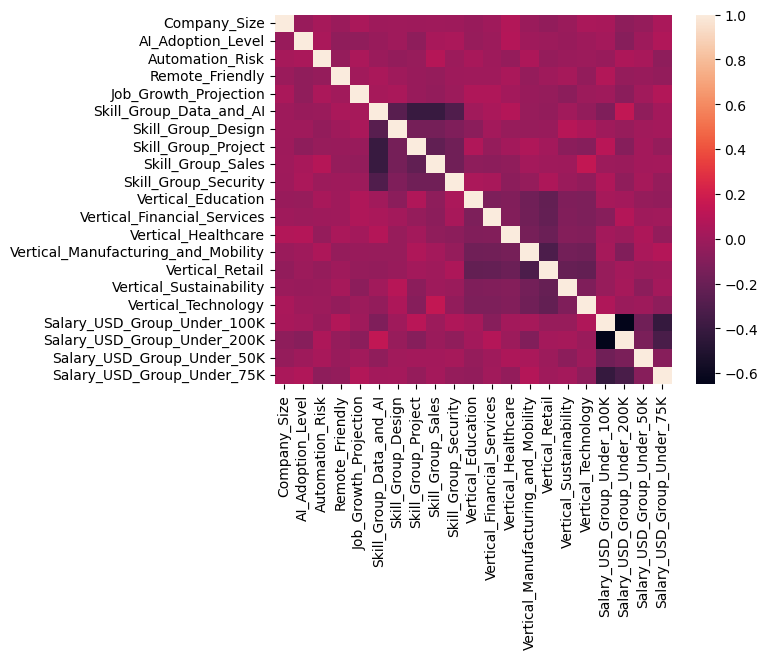

<Figure size 100x100 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df3.corr(method='pearson', min_periods=50))
fig = plt.figure(figsize = (1, 1))
fig.show()

StatementMeta(, d7659f6a-3ac1-4136-8695-afef992ed470, 25, Finished, Available, Finished)

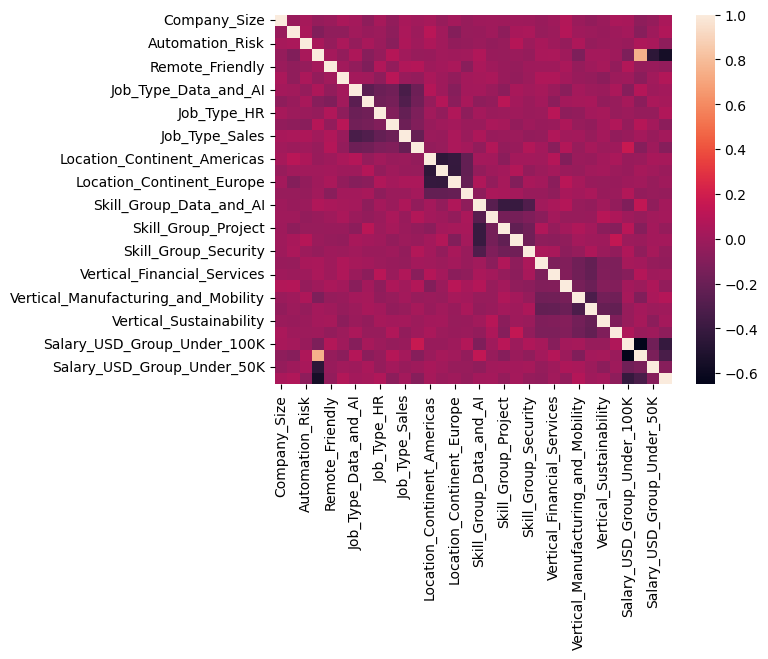

<Figure size 4000x4000 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr(method='pearson', min_periods=50))
plt.figure(figsize = (40, 40))
plt.show()

please upload to lakehouse

StatementMeta(, d7659f6a-3ac1-4136-8695-afef992ed470, 26, Finished, Available, Finished)

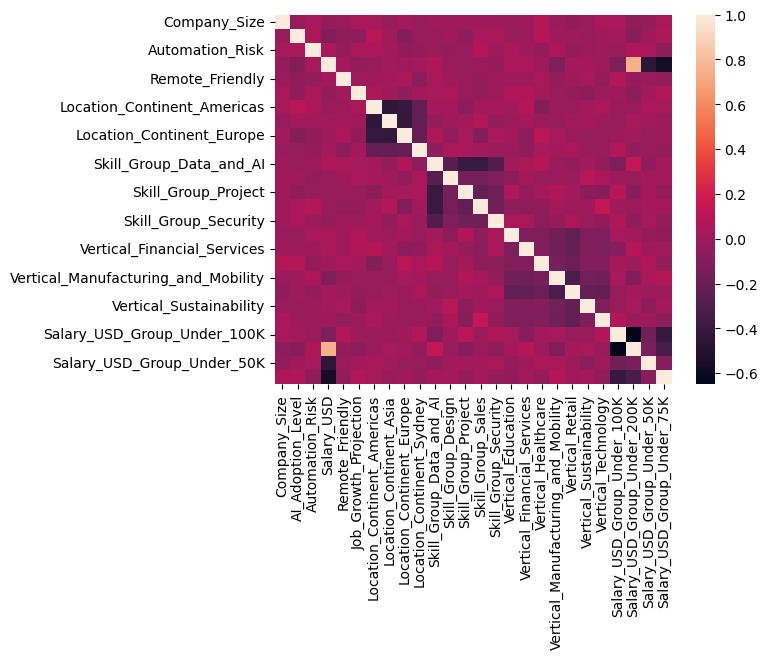

<Figure size 4000x4000 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df2.corr(method='pearson', min_periods=50))
plt.figure(figsize = (40, 40))
plt.show()

StatementMeta(, d7659f6a-3ac1-4136-8695-afef992ed470, 27, Finished, Available, Finished)

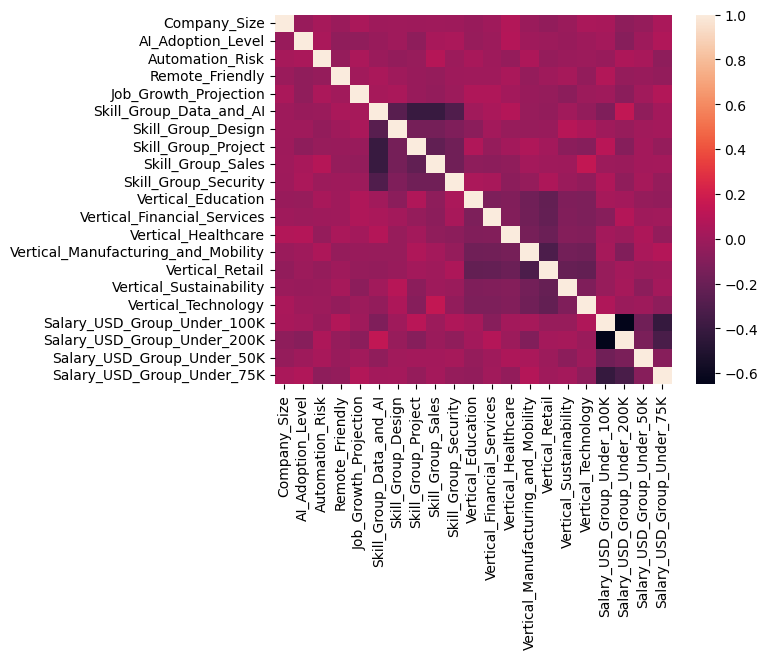

<Figure size 100x100 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df3.corr(method='pearson', min_periods=50))
fig = plt.figure(figsize = (1, 1))
fig.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df4.corr(method='pearson', min_periods=50))
fig = plt.figure(figsize = (1, 1))
fig.show()

StatementMeta(, , , Cancelled, , Cancelled)

StatementMeta(, 3832df14-c490-42e1-8376-88c4eb17450d, 26, Finished, Available, Finished)

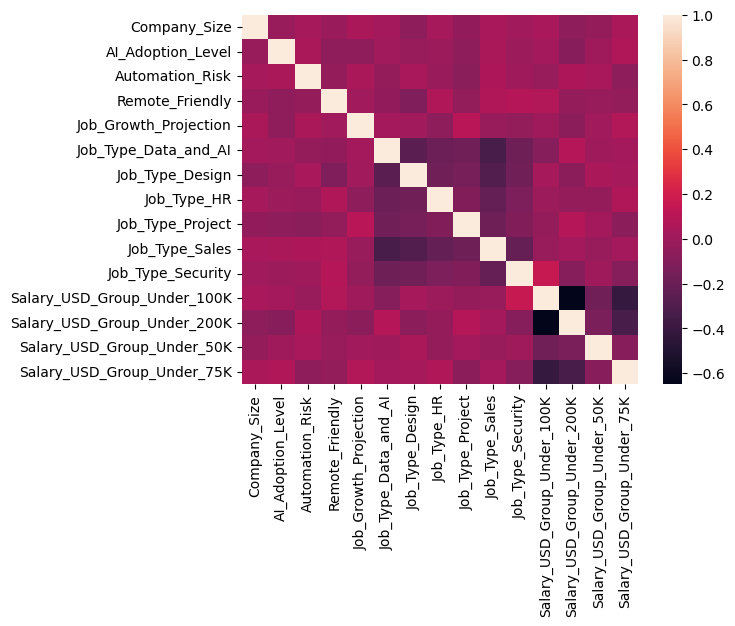

<Figure size 100x100 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df5.corr(method='pearson', min_periods=50))
fig = plt.figure(figsize = (1, 1))
fig.show()

StatementMeta(, 3832df14-c490-42e1-8376-88c4eb17450d, 27, Finished, Available, Finished)

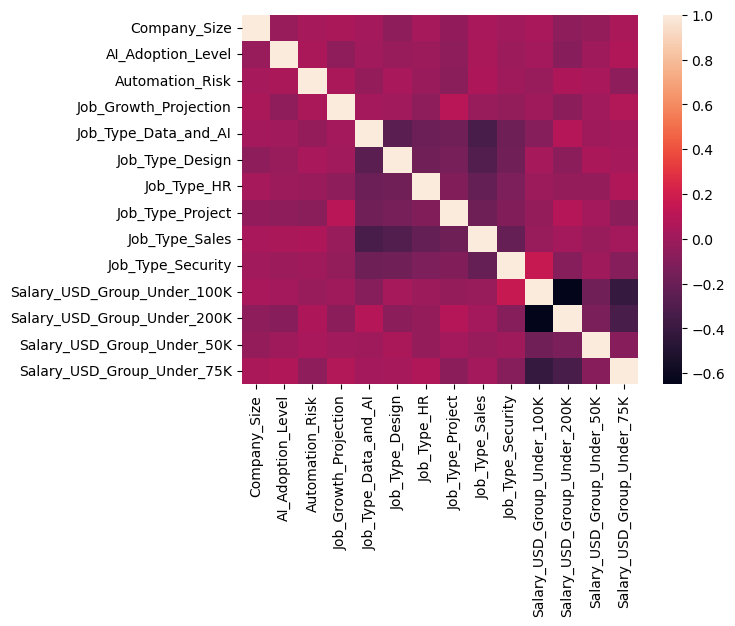

<Figure size 100x100 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df6.corr(method='pearson', min_periods=50))
fig = plt.figure(figsize = (1, 1))
fig.show()

StatementMeta(, 3832df14-c490-42e1-8376-88c4eb17450d, 28, Finished, Available, Finished)

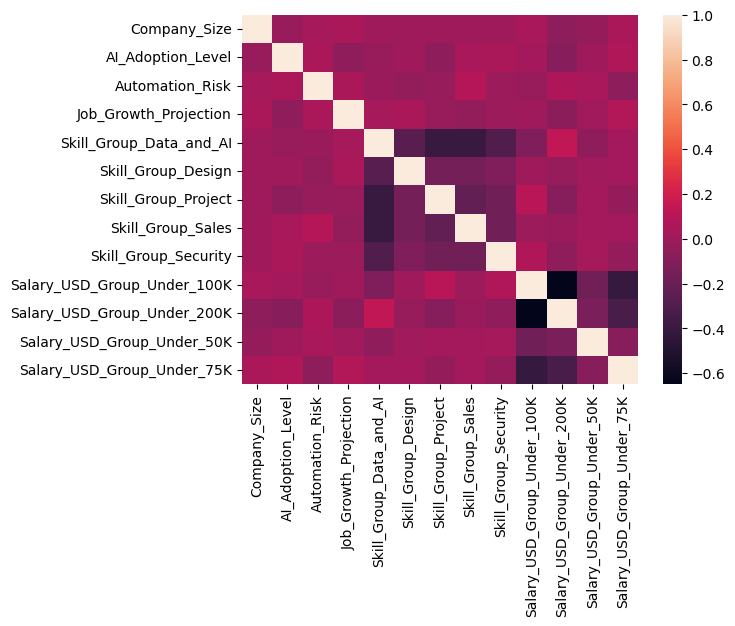

<Figure size 100x100 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df7.corr(method='pearson', min_periods=50))
fig = plt.figure(figsize = (1, 1))
fig.show()

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df8.corr(method='pearson', min_periods=50))
fig = plt.figure(figsize = (1, 1))
fig.show()

StatementMeta(, d7659f6a-3ac1-4136-8695-afef992ed470, 28, Finished, Available, Finished)

NameError: name 'df8' is not defined

In [28]:
#y = df['Automation_Risk']
#X = df.drop(['Automation_Risk'], axis = 1)

y = df7['Automation_Risk']
X = df7.drop(['Automation_Risk'], axis = 1)

StatementMeta(, 3832df14-c490-42e1-8376-88c4eb17450d, 30, Finished, Available, Finished)

In [29]:
X = np.asarray(X).astype('float32')
print(X)

StatementMeta(, 3832df14-c490-42e1-8376-88c4eb17450d, 31, Finished, Available, Finished)

[[0.  0.5 1.  ... 1.  0.  0. ]
 [1.  0.5 0.  ... 0.  0.  0. ]
 [1.  0.5 1.  ... 1.  0.  0. ]
 ...
 [1.  1.  0.5 ... 0.  0.  0. ]
 [1.  1.  0.5 ... 0.  0.  0. ]
 [0.5 0.5 0.  ... 0.  0.  1. ]]


In [30]:
y = np.asarray(y).astype('float32')
print(y)

StatementMeta(, 3832df14-c490-42e1-8376-88c4eb17450d, 32, Finished, Available, Finished)

[1.  1.  1.  1.  0.  0.5 1.  0.  0.  0.  1.  1.  0.5 1.  1.  0.  0.5 1.
 1.  0.  0.  1.  0.5 0.5 0.  0.  1.  0.  1.  0.5 0.5 1.  0.  0.5 0.  0.5
 1.  1.  1.  0.5 0.  0.  0.  0.5 0.5 0.5 0.5 0.5 0.  0.5 0.5 0.  0.5 0.
 0.  1.  1.  1.  1.  0.5 1.  0.  0.5 1.  0.  0.5 0.5 1.  0.5 0.  0.5 0.
 0.5 1.  0.  0.5 0.5 0.5 0.  0.  0.  1.  1.  0.  0.5 1.  0.  0.5 1.  0.5
 0.5 0.5 0.5 1.  1.  1.  0.  1.  0.5 1.  0.5 0.  0.5 0.5 0.5 0.  1.  1.
 0.  0.5 1.  0.  1.  0.  0.5 1.  0.  1.  1.  1.  1.  0.  0.5 0.  0.  0.
 0.5 1.  1.  1.  0.5 1.  0.5 1.  1.  0.  0.5 0.  0.  0.  0.5 0.5 1.  0.
 1.  0.  0.5 0.5 0.5 0.  0.5 0.  1.  0.  1.  0.  1.  0.5 1.  0.5 0.5 1.
 0.  0.  0.  0.  0.  0.5 0.  0.5 0.5 0.5 1.  1.  0.5 1.  0.  0.  0.5 0.
 0.5 0.5 0.  1.  0.  0.  0.5 0.5 0.5 0.5 1.  1.  1.  0.5 0.5 0.5 1.  0.5
 0.  0.  0.5 0.  0.  1.  0.5 0.5 1.  0.  0.  0.5 0.  1.  1.  0.5 1.  1.
 0.5 1.  1.  1.  0.  0.5 0.5 0.5 0.  0.  0.5 0.  0.5 0.  1.  1.  0.5 0.
 0.  1.  1.  0.  0.  0.  0.  0.  0.  0.5 0.  1.  0.5 0.  1.  

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

StatementMeta(, 3832df14-c490-42e1-8376-88c4eb17450d, 33, Finished, Available, Finished)

In [32]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

StatementMeta(, 3832df14-c490-42e1-8376-88c4eb17450d, 34, Finished, Available, Finished)

2024-09-27 07:54:11.570886: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-27 07:54:17.460401: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
ann.add(tf.keras.layers.Dense(units=13, activation='relu')) ##input layer

StatementMeta(, 3832df14-c490-42e1-8376-88c4eb17450d, 35, Finished, Available, Finished)

In [34]:
ann.add(tf.keras.layers.Dense(units=16, activation='relu')) ##hidden layer 1

StatementMeta(, 3832df14-c490-42e1-8376-88c4eb17450d, 36, Finished, Available, Finished)

In [35]:
ann.add(tf.keras.layers.Dense(units=16, activation='relu')) ##hidden layer 2

StatementMeta(, 3832df14-c490-42e1-8376-88c4eb17450d, 37, Finished, Available, Finished)

In [36]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) ##output layer

StatementMeta(, 3832df14-c490-42e1-8376-88c4eb17450d, 38, Finished, Available, Finished)

In [37]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.00010)
ann.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

StatementMeta(, 3832df14-c490-42e1-8376-88c4eb17450d, 39, Finished, Available, Finished)

In [38]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'accuracy', mode = 'max', verbose = 1, patience = 500)  

StatementMeta(, 3832df14-c490-42e1-8376-88c4eb17450d, 40, Finished, Available, Finished)

In [39]:
ann.fit(X_train, y_train, batch_size = 16, epochs = 1000, validation_data = (X_test, y_test)
        , callbacks = [early_stop]
       )

StatementMeta(, 3832df14-c490-42e1-8376-88c4eb17450d, 41, Finished, Available, Finished)

2024-09-27:07:54:59,436 WARNING  [tracking_store.py:153] log_inputs not supported
2024-09-27:07:54:59,437 WARNING  [tracking_store.py:153] log_inputs not supported


Epoch 1/1000
25/25 [==============================] - 4s 70ms/step - loss: 0.6928 - accuracy: 0.3275 - val_loss: 0.6827 - val_accuracy: 0.4000
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.3275 - val_loss: 0.6831 - val_accuracy: 0.4200
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.3325 - val_loss: 0.6834 - val_accuracy: 0.4200
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.3325 - val_loss: 0.6837 - val_accuracy: 0.4200
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.3300 - val_loss: 0.6840 - val_accuracy: 0.4100
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.3375 - val_loss: 0.6843 - val_accuracy: 0.4000

In [40]:
ann.summary()

StatementMeta(, 3832df14-c490-42e1-8376-88c4eb17450d, 42, Finished, Available, Finished)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                169       
                                                                 
 dense_1 (Dense)             (None, 16)                224       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 682
Trainable params: 682
Non-trainable params: 0
_________________________________________________________________


In [41]:
pd.set_option('display.max_columns', None)
df7.head()

StatementMeta(, 3832df14-c490-42e1-8376-88c4eb17450d, 43, Finished, Available, Finished)

,Company_Size,AI_Adoption_Level,Automation_Risk,Job_Growth_Projection,Skill_Group_Data_and_AI,Skill_Group_Design,Skill_Group_Project,Skill_Group_Sales,Skill_Group_Security,Salary_USD_Group_Under_100K,Salary_USD_Group_Under_200K,Salary_USD_Group_Under_50K,Salary_USD_Group_Under_75K
0,0.0,0.5,1.0,1.0,False,True,False,False,False,False,True,False,False
1,1.0,0.5,1.0,0.0,False,False,False,True,False,True,False,False,False
2,1.0,0.5,1.0,1.0,False,True,False,False,False,False,True,False,False
3,0.0,0.0,1.0,1.0,False,False,True,False,False,True,False,False,False
4,0.0,0.0,0.0,0.0,True,False,False,False,False,True,False,False,False


In [42]:
from pyspark.sql import SparkSession
#Create PySpark SparkSession
spark = SparkSession.builder \
    .master("local[1]") \
    .appName("AIGR_Spark") \
    .getOrCreate()
#Create PySpark DataFrame from Pandas
sparkDF=spark.createDataFrame(df7) 
sparkDF.printSchema()


sparkDF.write.mode("overwrite").format("delta").option("mergeSchema", "true").saveAsTable("AIGR_Dataset_v2")

StatementMeta(, 3832df14-c490-42e1-8376-88c4eb17450d, 44, Finished, Available, Finished)

root
 |-- Company_Size: double (nullable = true)
 |-- AI_Adoption_Level: double (nullable = true)
 |-- Automation_Risk: double (nullable = true)
 |-- Job_Growth_Projection: double (nullable = true)
 |-- Skill_Group_Data_and_AI: boolean (nullable = true)
 |-- Skill_Group_Design: boolean (nullable = true)
 |-- Skill_Group_Project: boolean (nullable = true)
 |-- Skill_Group_Sales: boolean (nullable = true)
 |-- Skill_Group_Security: boolean (nullable = true)
 |-- Salary_USD_Group_Under_100K: boolean (nullable = true)
 |-- Salary_USD_Group_Under_200K: boolean (nullable = true)
 |-- Salary_USD_Group_Under_50K: boolean (nullable = true)
 |-- Salary_USD_Group_Under_75K: boolean (nullable = true)



In [43]:
predict_me = [ \
    [ \
        #Company Size
        0,

        #AI_Adoption_Level
        0,       

        #Job_Growth_Projection
        0.5,

        #Skill_Group_Data_and_AI
        1,

        #Skill_Group_Design
        0,

        #Skill_Group_Project
        0,

        #Skill_Group_Sales
        0,

        #Skill_Group_Security
        0,

        #Salary_USD_Group_Under_100K
        1,
        
        #Salary_USD_Group_Under_200K
        0,
        
        #Salary_USD_Group_Under_50K
        0,
        
        #Salary_USD_Group_Under_75K
        0
        ]]

StatementMeta(, 3832df14-c490-42e1-8376-88c4eb17450d, 45, Finished, Available, Finished)

In [47]:
predict_adhoc = [ \
    [ \
        #Company Size
        1,

        #AI_Adoption_Level
        1,       

        #Job_Growth_Projection
        0,

        #Skill_Group_Data_and_AI
        0,

        #Skill_Group_Design
        0,

        #Skill_Group_Project
        0,

        #Skill_Group_Sales
        1,

        #Skill_Group_Security
        0,

        #Salary_USD_Group_Under_100K
        0,
        
        #Salary_USD_Group_Under_200K
        0,
        
        #Salary_USD_Group_Under_50K
        0,
        
        #Salary_USD_Group_Under_75K
        1
        ]]

StatementMeta(, 3832df14-c490-42e1-8376-88c4eb17450d, 49, Finished, Available, Finished)

In [48]:
#SUPPRESS SCIENTIFIC NOTATION
np.set_printoptions(precision=16, suppress=True)
#pd.options.display.float_format = '{:.2f}'.format

StatementMeta(, 3832df14-c490-42e1-8376-88c4eb17450d, 50, Finished, Available, Finished)

In [45]:
#1.0 = Bad for you
#0.0 = Great for you

ann.predict(predict_me)

StatementMeta(, 3832df14-c490-42e1-8376-88c4eb17450d, 47, Finished, Available, Finished)

1/1 [==============================] - 0s 32ms/step


array([[0.20781197]], dtype=float32)

In [50]:
ann.predict(predict_adhoc)

StatementMeta(, 3832df14-c490-42e1-8376-88c4eb17450d, 52, Finished, Available, Finished)

1/1 [==============================] - 0s 51ms/step


array([[0.5525196]], dtype=float32)